Understanding the Data

In [ ]:
# Book Figure 4-1

import pandas as pd

# nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

# nls97.head()
# nls97.tail()
# nls97.sample(10,random_state=3).T
# nls97[1000:1004].T
# nls97.loc[[100061,100139,100284]].T # select based on index
# nls97.iloc[[0,1,2]].T # Select based on row number
# nls97.iloc[-3:].T #last three
# nls97.iloc[:,0:50] # same as above
# nls97.loc[(nls97['gender']=="Female") & (nls97['maritalstatus']=="Married")]
# nls97.size
# nls97.shape
# nls97.dtypes
# nls97.info()
# nls97.describe()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Missing Data

In [ ]:
# Book Figure 4-2

import pandas as pd

covidtotals = pd.read_csv("/content/drive/MyDrive/covidtotals.csv")
nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

# print(covidtotals.isnull().sum(axis=0))
# covidtotals.total_cases_pm.fillna(covidtotals.total_cases/(covidtotals.population/1000000), inplace=True)
# covidtotals.total_deaths_pm.fillna(covidtotals.total_deaths/(covidtotals.population/1000000), inplace=True)
# covidtotals.isnull().sum(axis=0)

# print(nls97.isnull().sum(axis=0))
# nls97.birthmonth.fillna(int(nls97.birthmonth.mean()), inplace=True)# set a value for the missing data
# nls97new= nls97.dropna(thresh=10, axis=1)# thresh=N requires that a row (axis=0) or column(axis=1) has at least N non-NaNs to survive.
print(nls97.wageincome.isnull().sum(axis=0))
nls97.wageincome.fillna(method='ffill', inplace=True)# replace missing values with the nearest non-missing value preceding
print(nls97.wageincome.isnull().sum(axis=0))
# print(nls97new.isnull().sum(axis=0))
# print(nls97.shape,nls97new.shape)

3893
0


Inconsistency of Data

In [ ]:
# Book Figure 4-3

import numpy as np
import pandas as pd

nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

# nls97.info()
# nls97['birthyear'] = pd.to_numeric(nls97['birthyear']) #Convert argument to a numeric type.
# nls97['gender'].value_counts()
# np.where(nls97.govprovidejobs.isnull(),np.nan,np.where(nls97.govprovidejobs.str.contains("not"),"No","Yes")) # pattern exists in a string.
# nls97.maritalstatus.str.startswith(' ').any()#leading space
# nls97.maritalstatus.str.endswith(' ').any()#tailing space
# nls97.maritalstatus = nls97.maritalstatus.str.strip()# Remove leading/trailing whitespaces
# nls97.maritalstatus = nls97.maritalstatus.str.lower()# Convert text to lowercase
pd.concat([nls97.weeklyhrstv.head(), nls97.weeklyhrstv.str.findall("\d+").head()],axis=1)# extract numeric values from a text string


,weeklyhrstv,weeklyhrstv
0,11 to 20 hours a week,"[11, 20]"
1,3 to 10 hours a week,"[3, 10]"
2,11 to 20 hours a week,"[11, 20]"
3,NaN,NaN
4,3 to 10 hours a week,"[3, 10]"


Conceptual Inconsistency

In [19]:
# Book Figure 4-4

import pandas as pd

nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")
nls97.head()
#with post-graduate enrollment but no bachelor's enrollment
# nobach = nls97.loc[nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='4').any(axis=1) & ~nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='3').any(axis=1), "colenrfeb97":"colenroct17"]
# print(nobach.head())
#wage income but no weeks worked
# nls97.loc[(nls97.weeksworked16==0) & nls97.wageincome>0, ['weeksworked16','wageincome']]
# # a high wage income.
# highwages = nls97.loc[abs(nls97.wageincome) >abs(nls97.wageincome.mean())+(nls97.wageincome.std()*3),['wageincome']]
# print(highwages.head())
# # large changes in weeks worked for the most recent year
workchanges = nls97.loc[~nls97.loc[:, "weeksworked12":"weeksworked16"].mean(axis=1). between(nls97.weeksworked17*0.5,nls97.weeksworked17*2)  & ~nls97.weeksworked17.isnull(),"weeksworked12":"weeksworked17"]
workchanges.head()

,weeksworked12,weeksworked13,weeksworked14,weeksworked15,weeksworked16,weeksworked17
2,0.0,NaN,11.0,52.0,47.0,0.0
13,0.0,0.0,0.0,0.0,0.0,45.0
18,52.0,9.0,0.0,32.0,0.0,0.0
19,52.0,52.0,52.0,17.0,0.0,17.0
25,52.0,52.0,17.0,0.0,0.0,0.0


Duplicates

In [32]:
# Book Figure 4-5

import numpy as np
import pandas as pd

nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

nls97.set_index("personid", inplace=True)
print('data shape:',nls97.shape)
print('unique indexes:',nls97.index.nunique()) # find unique index in personid
print('duplicated data:',nls97.duplicated().value_counts()) # find duplicates in the database
nls97.duplicated(subset=['weeksworked17']).value_counts()

data shape: (8984, 88)
unique indexes: 8984
duplicated data: False    8963
True       21
dtype: int64


True     8930
False      54
dtype: int64

Outliers

1) Z-score, IQR, Scatter plot

343     235884.0
359     235884.0
541     235884.0
651     235884.0
661     235884.0
          ...   
8650    235884.0
8663    235884.0
8744    235884.0
8817    235884.0
8880    235884.0
Name: wageincome, Length: 121, dtype: float64
1       120000.0
43      130000.0
116     124000.0
186     130000.0
236     140000.0
          ...   
8829    120000.0
8880    235884.0
8890    124847.0
8933    130000.0
8966    140000.0
Name: wageincome, Length: 260, dtype: float64


,personid,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
9,101132,Female,8,1984,11.0,Never-married,1.0,1.0,0.0,4 to 6 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
19,101724,Female,2,1981,15.0,Divorced,3.0,0.0,0.0,10 hours or more a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,3. 4-year college,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
29,102625,Female,3,1980,12.0,Married,3.0,0.0,1200.0,4 to 6 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
34,102877,Male,11,1983,8.0,Never-married,NaN,NaN,3000.0,1 to 3 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
78,107125,Female,6,1984,13.0,Married,1.0,0.0,3000.0,None,...,1. Not enrolled,1. Not enrolled,2. 2-year college,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,991752,Female,12,1982,15.0,Never-married,NaN,NaN,7000.0,4 to 6 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
8906,991756,Male,11,1981,14.0,Married,3.0,0.0,9000.0,7 to 9 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
8927,993910,Female,10,1980,16.0,Married,2.0,0.0,1900.0,10 hours or more a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
8931,994239,Female,9,1984,16.0,Married,2.0,0.0,4000.0,10 hours or more a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


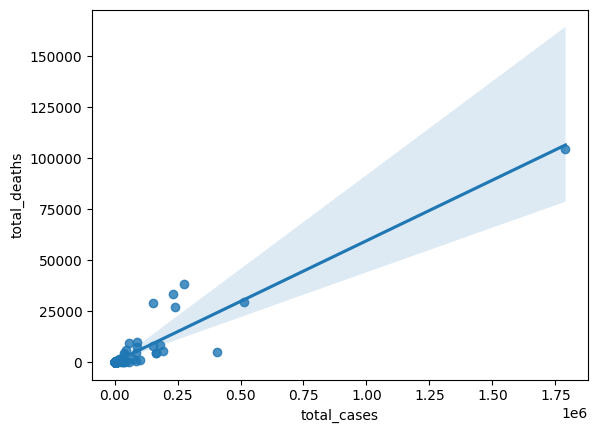

In [39]:
# Book Figure 4-6

import numpy as np
import pandas as pd
import seaborn as sns

nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")
covidtotals = pd.read_csv("/content/drive/MyDrive/covidtotals.csv")


# Z Value approach
z_scores = np.abs((nls97['wageincome'] - nls97['wageincome'].mean()) / nls97['wageincome'].std())
outliers = nls97[z_scores > 3]
print(outliers.wageincome)

# IQR approach
thirdq,firstq=nls97['wageincome'].quantile(0.75),nls97['wageincome'].quantile(0.25)
IQR=thirdq-firstq
outlierhigh, outlierlow = 1.5*IQR+thirdq,firstq-1.5*IQR
print(nls97['wageincome'].loc[(nls97['wageincome']>outlierhigh)|(nls97['wageincome']<outlierlow)])

# Scatter plot and filter
ax = sns.regplot(x="total_cases", y="total_deaths",data=covidtotals)
covidtotals.loc[(covidtotals.total_cases_pm<7500)  & (covidtotals.total_deaths_pm>250), ['location','total_cases_pm','total_deaths_pm']]



2) Box Plot

Text(1.15, 220, 'outlier threshold')

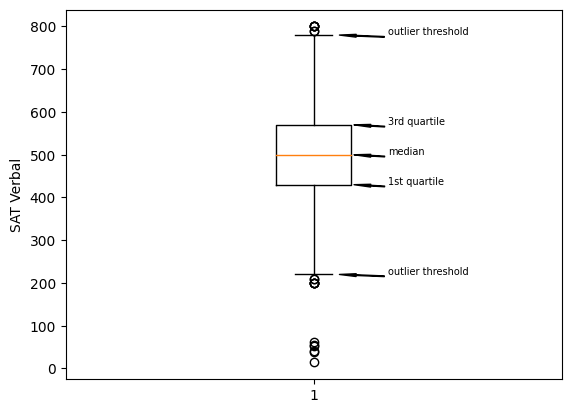

In [40]:
# Book Figure 4-9

import matplotlib.pyplot as plt
import pandas as pd
nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

plt.boxplot(nls97.satverbal.dropna())
plt.ylabel("SAT Verbal")
plt.annotate('outlier threshold',xy=(1.05,780), xytext=(1.15,780), size=7,arrowprops=dict(facecolor='black', headwidth=2,width=0.5, shrink=0.02))
plt.annotate('3rd quartile',xy=(1.08,570), xytext=(1.15,570), size=7,arrowprops=dict(facecolor='black', headwidth=2,width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500),xytext=(1.15,500), size=7,arrowprops=dict(facecolor='black', headwidth=2,width=0.5, shrink=0.02))
plt.annotate('1st quartile',xy=(1.08,430), xytext=(1.15,430), size=7,arrowprops=dict(facecolor='black', headwidth=2,width=0.5, shrink=0.02))
plt.annotate('outlier threshold',xy=(1.05,220), xytext=(1.15,220), size=7,arrowprops=dict(facecolor='black', headwidth=2,width=0.5, shrink=0.02))


3) Violin Plot

Text(-0.4, 500, 'frequency')

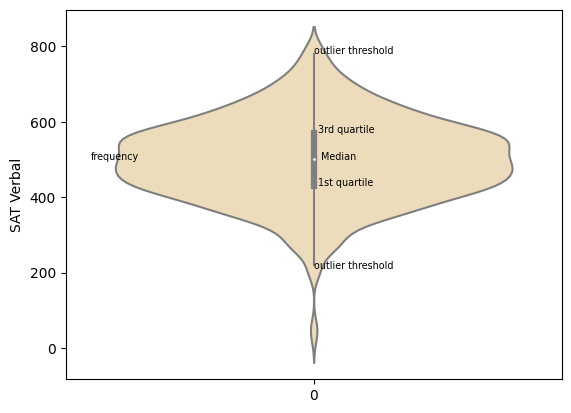

In [41]:
# Book Figure 4-10

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

sns.violinplot(nls97.satverbal, color="wheat",orient="v")
plt.ylabel("SAT Verbal")
plt.text(0.08, 780, "outlier threshold", horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.75), "3rd quartile", horizontalalignment='center', size='x-small')
plt.text(0.05, nls97.satverbal.median(), "Median",horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.25), "1st quartile", horizontalalignment='center', size='x-small')
plt.text(0.08, 210, "outlier threshold",horizontalalignment='center', size='x-small')
plt.text(-0.4, 500, "frequency",horizontalalignment='center', size='x-small')


4) KNN

In [42]:
# Book Figure 4-11

import pandas as pd

covidtotals = pd.read_csv("/content/drive/MyDrive/covidtotals.csv")

!pip install pyod
!pip installsklearn
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
analysisvars = ['location','total_cases_pm','total_deaths_pm', 'pop_density','median_age','gdp_per_capita']
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])
clf_name = 'KNN'
clf = KNN(contamination=0.1)
clf.fit(covidanalysisstand)
KNN(algorithm='auto', contamination=0.1, leaf_size=30,method='largest',metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,radius=1.0)
y_pred = clf.labels_
y_scores = clf.decision_scores_
pred = pd.DataFrame(zip(y_pred, y_scores),columns=['outlier','scores'],index=covidanalysis.index)
pred.sample(10, random_state=1)
covidanalysis.join(pred).loc[pred.outlier==1,['location','total_cases_pm','total_deaths_pm','scores']].sort_values(['scores'], ascending=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=e8d389245ffc0efe4dd544e58df4e50168490c1065ebd5e7216197060f8e45c4
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod
ERROR: unknown command "installsklearn" - maybe you meant "install"


,location,total_cases_pm,total_deaths_pm,scores
169,Singapore,5962.727,3.931,11.976713
155,Qatar,19753.146,13.190,7.994635
18,Belgium,5037.354,816.852,3.545274
14,Bahrain,6698.468,11.166,3.284420
115,Luxembourg,6418.776,175.726,2.461565
177,Spain,5120.952,580.197,2.190121
105,Kuwait,6332.420,49.642,2.126949
198,United Kingdom,4047.403,566.965,2.112294
97,Italy,3853.985,552.663,2.107751
120,Maldives,3280.041,9.250,2.094073


Data Transformation

In [43]:
# Book Figure 4-13

import pandas as pd

nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

# replacing values
nls97['gender'].replace(['Female', 'Male'], [1, 2], inplace=True)
print(nls97.head())

# One-hot encode categorical variables
nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")
nls97_encoded = pd.get_dummies(nls97, columns=['gender'])
nls97_encoded.head()


   personid  gender  birthmonth  birthyear  highestgradecompleted  \
0    100061       1           5       1980                   13.0   
1    100139       2           9       1983                   12.0   
2    100284       2          11       1984                    7.0   
3    100292       2           4       1982                    NaN   
4    100583       2           1       1980                   13.0   

   maritalstatus  childathome  childnotathome  wageincome  \
0        Married          4.0             0.0     12500.0   
1        Married          2.0             0.0    120000.0   
2  Never-married          1.0             0.0     58000.0   
3            NaN          NaN             NaN         NaN   
4        Married          4.0             0.0     30000.0   

         weeklyhrscomputer  ...      colenrfeb13      colenroct13  \
0  10 hours or more a week  ...  1. Not enrolled  1. Not enrolled   
1      1 to 3 hours a week  ...  1. Not enrolled  1. Not enrolled   
2          

,personid,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17,gender_Female,gender_Male
0,100061,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1,0
1,100139,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,0,1
2,100284,11,1984,7.0,Never-married,1.0,0.0,58000.0,None,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,0,1
3,100292,4,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN,NaN,NaN,NaN,0,1
4,100583,1,1980,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,0,1


Data Balancing

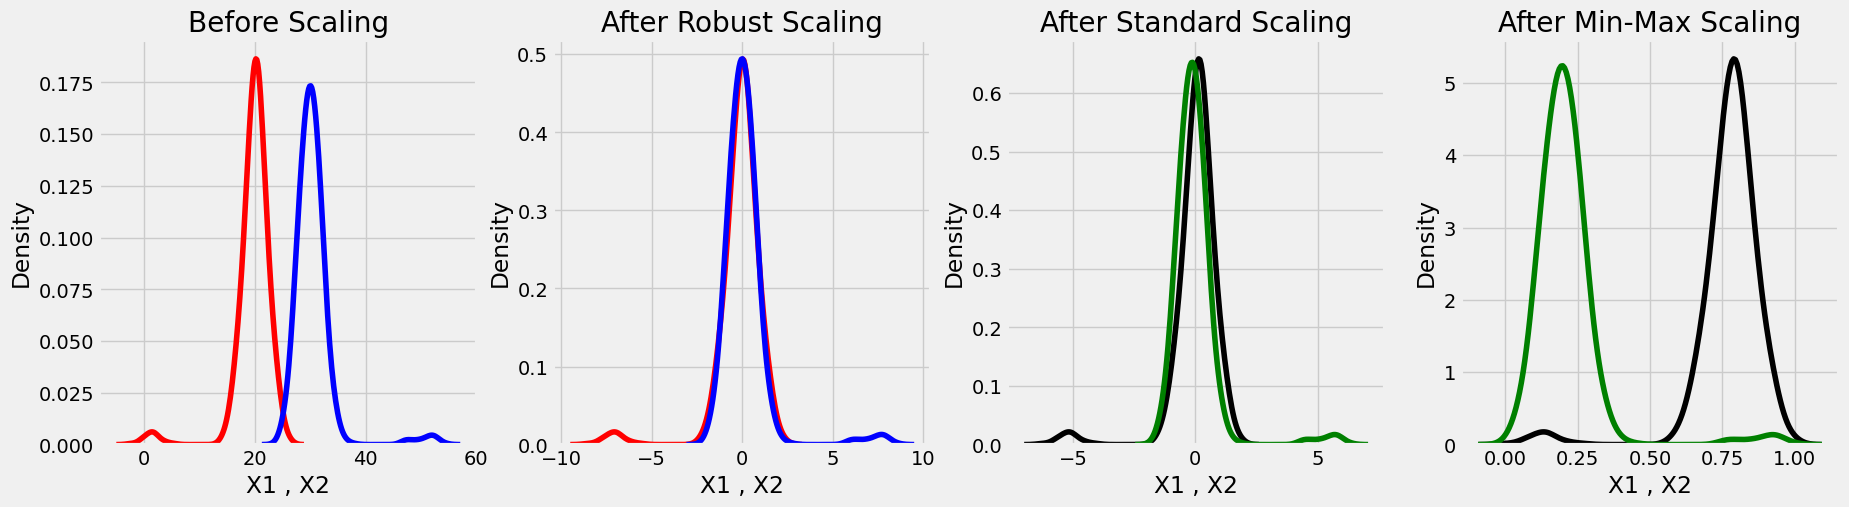

In [44]:
# Book Figure 4-15

# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
ax1.set_xlabel('X1 , X2')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
ax2.set_xlabel('X1 , X2')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
ax3.set_xlabel('X1 , X2')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
ax4.set_xlabel('X1 , X2')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()


Data creating and subsitution

In [45]:
# Book Figure 4-16

import pandas as pd

nls97 = pd.read_csv("/content/drive/MyDrive/nls97.csv")

# create new column/variable
gpaoverall100 = nls97['gpaoverall'] * 100
nls97['childnum'] = nls97.childathome + nls97. childnotathome

# replacing new value in the dataframe
nls97.index
nls97.childnum.value_counts().sort_index()
nls97.iloc[0, 13] = 2
nls97.set_index("personid", inplace=True)
nls97.loc[[100139,100284,100292],'gpaoverall'] = 0
nls97.loc[nls97.gpaoverall>4, 'gpaoverall'] = 4
nls97.weeklyhrscomputer.replace('None',0, inplace=True)
nls97.weeklyhrscomputer.value_counts()

#Delete column and rows
nls97.drop(columns="childnum")
nls97.drop(labels=[100284,100292], axis=0)

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17,childnum
personid,,,,,,,,,,,,,,,,,,,,,
100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,4.0
100139,Male,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,2.0
100583,Male,1,1980,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,4.0
100833,Male,1,1981,12.0,Married,2.0,0.0,39000.0,1 to 3 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,2.0
100931,Female,8,1983,15.0,Divorced,2.0,0.0,56000.0,10 hours or more a week,Less than 2 hours per week,...,2. 2-year college,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999291,Female,4,1981,16.0,Married,NaN,NaN,35000.0,7 to 9 hours a week,Less than 2 hours per week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN
999406,Male,7,1982,14.0,Never-married,NaN,NaN,116000.0,4 to 6 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN
999543,Female,8,1984,12.0,Divorced,2.0,0.0,NaN,0,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,2.0
